In [1]:
import random
import math
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [35]:
from numba import jit
@jit
def dotp(na,nb,nc,nd: int):
    angles=np.array([na,nb,nc,nd,0,0])

    alpha=angles[0] ;  beta=angles[1] ; gamma=angles[2]
    delta=angles[3] ; nue=angles[4] ; mu=angles[5]

    # order=[Rxy, Rxz, Rxw, Ryz, Ryw, Rzw]
    sin=[np.sin(np.radians(alpha)),np.sin(np.radians(beta)),np.sin(np.radians(gamma)),\
         np.sin(np.radians(delta)),np.sin(np.radians(mu)),np.sin(np.radians(nue))]
    cos=[np.cos(np.radians(alpha)),np.cos(np.radians(beta)),np.cos(np.radians(gamma)),\
         np.cos(np.radians(delta)),np.cos(np.radians(mu)),np.cos(np.radians(nue))]

    Rxy=[[cos[0], -sin[0],0,0],
         [sin[0], cos[0],0,0],
         [0,0,1,0],
         [0,0,0,1]]
    Rxz=[[cos[1],0,-sin[1],0],
         [0,1,0,0],
         [sin[1],0,cos[1],0],
         [0,0,0,1]]
    Rxw=[[cos[2], 0,0, -sin[2]],
         [0,1,0,0],
         [0,0,1,0],
         [sin[2],0,0,cos[2]]]
    Ryz=[[1,0,0,0],
         [0,cos[3],-sin[3],0],
         [0,sin[3],cos[3],0],
         [0,0,0,1]]
    Ryw=[[1,0,0,0],
         [0,cos[4],0,-sin[4]],
         [0,0,1,0],
         [0,sin[4],0,cos[4]]]
    Rzw=[[1,0,0,0],
         [0,1,0,0],
         [0,0,cos[5],-sin[5]],
         [0,0,sin[5],cos[5]]]

    R12 = np.matmul(Rxy, Rxz)
    R3=np.matmul(R12,Rxw)
    R4=np.matmul(R3,Ryz)
    R5=np.matmul(R4,Ryw)
    R6=np.matmul(R5,Rzw)
    return R6

def overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn):
    ##==========histogram overlapped region==================
    #========================================================
    e=np.histogram(xcoord[ind_m], bins= binn, range= [minl,maxl])
    g=np.histogram(xcoord[ind_c], bins= binn, range= [minl,maxl])

    mhist=np.array(e[0],dtype=int)  ;mrange=mhist.repeat(2)
    chist=np.array(g[0],dtype=int)*percent  ; crange=chist.repeat(2)
    chist1=np.array(g[1],dtype=float)  ; binrange1=chist1.repeat(2)[1:-1]

    mval=np.zeros(binn) ;   mval1=np.zeros(binn)
    frac1=np.zeros(binn) ;   mean_bin1=np.zeros(binn)
    maxbin=np.zeros(binn)

    for kj in range(len(mhist)):
        frac1[kj]+=min(mhist[kj],chist[kj])
        maxbin[kj]=max(mhist[kj],chist[kj])

    newlist1 = [xxs for xxs in frac1 if math.isnan(xxs) == False]

    over_p1=(sum(newlist1)/(sum(mhist)))
    maxbin=max(maxbin)
    return over_p1, maxbin, binrange1, mrange, crange

def find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1):
    mean_frac=np.zeros(len(rang))
    dif=np.zeros(len(rang))
    merger=np.zeros(len(rang)) ;   relax=np.zeros(len(rang))
    m_frac=np.zeros(len(rang)) ;   c_frac=np.zeros(len(rang))

    median_merger=np.median(rotated[ind_m, axis])
    median_merger1=np.median(rotated[ind_m, axis1])
    median_control=np.median(rotated[ind_c, axis])
    median_control1=np.median(rotated[ind_c, axis1])

    ##======================================================
    k=0
    percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
    rotated1=rotated[ind_all,:]
    ##======================================================
    for j in rang:    
        tota = np.where((rotated[:,axis] >= j) & (rotated[:,axis] < j+binn*2))
        aa1=np.shape(tota)[1]

        if median_merger >= median_control :
            tot = np.where(rotated1[:,axis] >= j)
            tot1 = np.where(rotated1[:,axis] < j)
        else : 
            tot = np.where(rotated1[:,axis] <= j)  
            tot1 = np.where(rotated1[:,axis] > j)

        cc=(rotated1[tot])
        ac=np.where(cc[:,4] == 1)
        bc=np.where(cc[:,4] == 10)
        merger[k]=np.shape(ac)[1]
        if (aa1>=bin_count) :
            m_frac[k]=(merger[k])/(np.shape(ac)[1]+np.shape(bc)[1]*percent)
        else :
            m_frac[k]= float('nan')

        cc1=(rotated1[tot1])
        ac1=np.where(cc1[:,4] == 1)
        bc1=np.where(cc1[:,4] == 10)
        relax[k]=np.shape(bc1)[1]

        if (aa1>=bin_count) :
            c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)
        else :
            c_frac[k]= float('nan')

        mean_frac[k]=((m_frac[k]+c_frac[k])/2)
        np.nan_to_num(mean_frac, copy=False)
        k=k+1

    nearz=np.where(abs(rang) == min(abs(rang)))[0]                
    minvalp=nearz
    return minvalp, m_frac, c_frac, mean_frac, median_merger, median_control



start: 1743029786.5041442
time check: 0.03673148155212402


C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 40, 60, point:0.148645, mean: 0.5872763, std: 0.1805953
coeff: -0.742945*x+-0.131001*y+0.133022*z+0.642788*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.148645, success rate: 0.674934 , overlap percentage: 41.333333, dividing criteria: 1.261601 


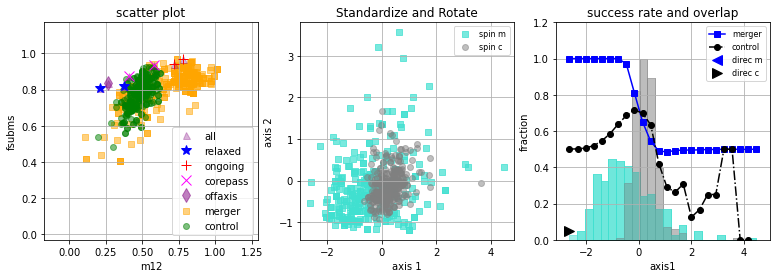

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 50, 60, point:0.093150, mean: 0.5872763, std: 0.1805953
coeff: -0.623405*x+-0.109923*y+0.111619*z+0.766044*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.093150, success rate: 0.630872 , overlap percentage: 43.000000, dividing criteria: 1.200872 


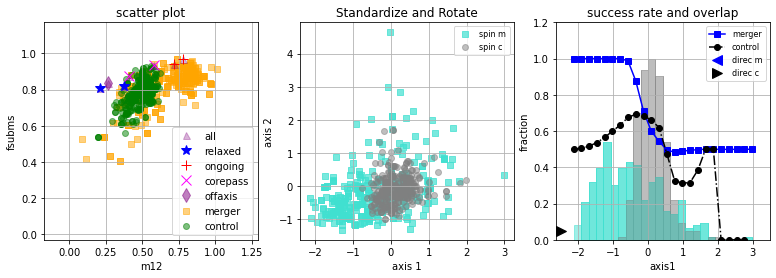

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 60, 60, point:-0.176280, mean: 0.5872763, std: 0.1805953
coeff: -0.484923*x+-0.085505*y+0.086824*z+0.866025*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:-0.176280, success rate: 0.662187 , overlap percentage: 48.333333, dividing criteria: 1.178854 


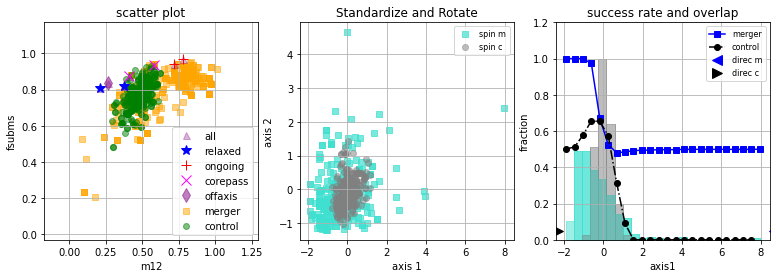

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 70, 60, point:-0.185882, mean: 0.5872763, std: 0.1805953
coeff: -0.331707*x+-0.058489*y+0.059391*z+0.939693*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:-0.185882, success rate: 0.591692 , overlap percentage: 47.333333, dividing criteria: 1.118359 


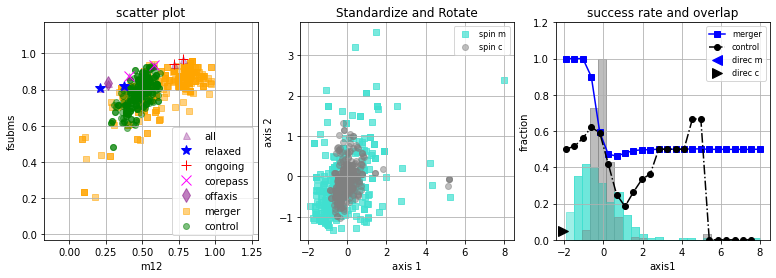

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 80, 60, point:0.142011, mean: 0.5872763, std: 0.1805953
coeff: -0.168412*x+-0.029696*y+0.030154*z+0.984808*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.142011, success rate: 0.414607 , overlap percentage: 55.333333, dividing criteria: 0.861274 


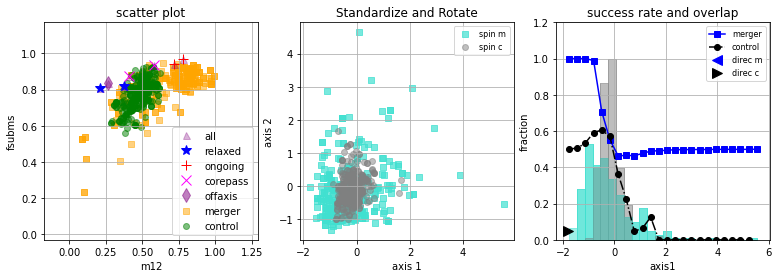

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 90, 60, point:0.075837, mean: 0.5872763, std: 0.1805953
coeff: -0.000000*x+-0.000000*y+0.000000*z+1.000000*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.075837, success rate: 0.647317 , overlap percentage: 59.000000, dividing criteria: 1.057317 


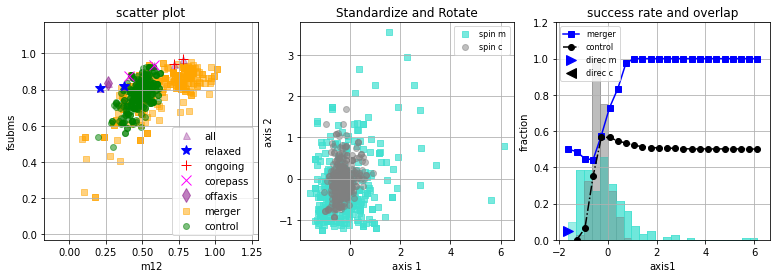

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 100, 60, point:0.038923, mean: 0.5872763, std: 0.1805953
coeff: 0.168412*x+0.029696*y+-0.030154*z+0.984808*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.038923, success rate: 0.728436 , overlap percentage: 55.000000, dividing criteria: 1.178436 


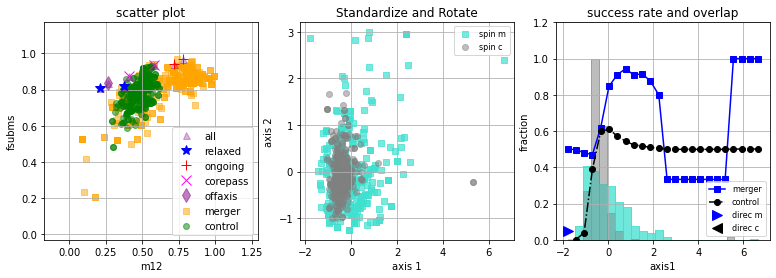

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 110, 60, point:0.007314, mean: 0.5872763, std: 0.1805953
coeff: 0.331707*x+0.058489*y+-0.059391*z+0.939693*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.007314, success rate: 0.769592 , overlap percentage: 54.333333, dividing criteria: 1.226259 


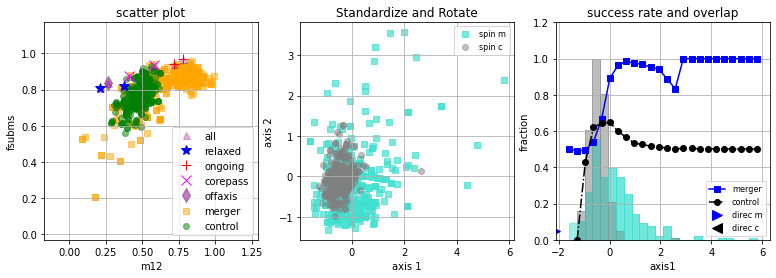

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 120, 60, point:-0.041303, mean: 0.5872763, std: 0.1805953
coeff: 0.484923*x+0.085505*y+-0.086824*z+0.866025*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:-0.041303, success rate: 0.798493 , overlap percentage: 45.000000, dividing criteria: 1.348493 


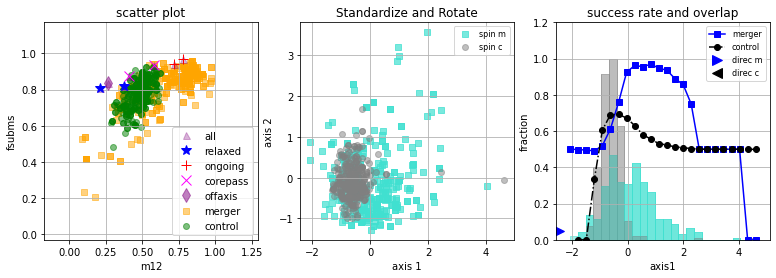

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 130, 60, point:-0.076309, mean: 0.5872763, std: 0.1805953
coeff: 0.623405*x+0.109923*y+-0.111619*z+0.766044*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:-0.076309, success rate: 0.849539 , overlap percentage: 36.333333, dividing criteria: 1.486206 


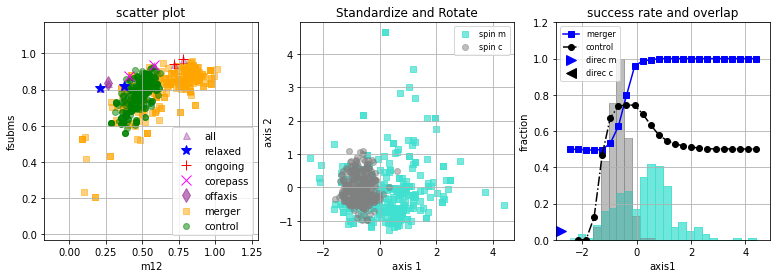

C:\Users\hyowon\AppData\Local\Temp/ipykernel_2724/1110803550.py:113: RuntimeWarning: invalid value encountered in double_scalars
  c_frac[k]=(relax[k]*percent)/(np.shape(ac1)[1]+np.shape(bc1)[1]*percent)


['m12', 'fsubms', 'sparsity', 'd_off'] ======================================================
degree : 190, 10, 140, 60, point:0.040932, mean: 0.5872763, std: 0.1805953
coeff: 0.742945*x+0.131001*y+-0.133022*z+0.642788*w,  coeff: 0.234923*x+-0.466290*y+0.852869*z+0.000000*w
 dividing point:0.040932, success rate: 0.854527 , overlap percentage: 33.000000, dividing criteria: 1.524527 


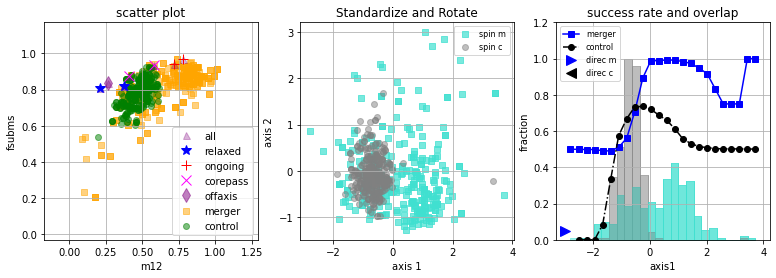

-0.01^{+ 0.05}_{-0.06}
 0.84^{+ 0.01}_{-0.01}
36.87^{+ 1.21}_{-1.46}
time: 67.54414486885071


In [39]:
import time
start = time.time() 
print('start:',start)
#=============read obs data===================
df1 = pd.read_csv('../2ndproj/test_obs.txt', \
                    sep='\s+', usecols=['cl_idn',  'sparsity', 'm12', 'doff', 'xi', 'fsub']) 

cl_idn=df1.loc[:, 'cl_idn'].values ; ob_doff=df1.loc[:, 'doff'].values
ob_m12=df1.loc[:, 'm12'].values ; ob_ksi=df1.loc[:, 'xi'].values ; ob_fsub=df1.loc[:, 'fsub'].values

ind_r=np.where((cl_idn == 'A963') | (cl_idn == 'A2261') )[0]
ind_u0=np.where((cl_idn == 'A2061') | (cl_idn == 'A2255'))[0]
ind_u1=np.where((cl_idn == 'A2034') | (cl_idn == 'A2443'))[0]
ind_u2=np.where((cl_idn == 'A115'))[0]

#=============read sim data===================
df = pd.read_csv('../Nclusterdata/test_sim.txt', \
                sep='\s+', usecols=['tsi','sparsity', 'm12', 'fsubms', 'ksi', 'd_off']) 

features = [['sparsity', 'm12', 'fsubms', 'ksi'],['m12',  'fsubms', 'sparsity', 'd_off'],\
            [ 'ksi', 'd_off','sparsity','fsubms'],[ 'm12', 'ksi','sparsity', 'd_off'],['m12','fsubms','ksi', 'd_off']]
features2 = [['sparsity', r'$\Delta$m12', 'f_m*', r'$\xi$'],[r'$\Delta$m12',  'f_m*', 'sparsity', 'd_off'],\
            [ r'$\xi$', 'd_off','sparsity','f_m*'],[ r'$\Delta$m12', r'$\xi$','sparsity', 'd_off'],[r'$\Delta$m12','f_m*',r'$\xi$', 'd_off']]
#===========================================================
min_op=np.zeros(6) ; over_p=100 ; success_r=0 ; dv_criteria=0
axes=np.array([0,1,2,3], dtype='object'); axis=0 ; axis1=1 ; ang_x=np.linspace(0,360,37) #73
#=============================================================

#for ii in range(3,4,1):#range(len(features)):
ii=1
#indicator=random.sample(features, 3)
#print(features[ii])
xx1 = df.loc[:, features[ii]].values
scaler = StandardScaler()
xx=scaler.fit_transform(xx1)
mean=scaler.mean_ ; std=scaler.scale_ 

x = xx[:,0] ; y = xx[:,1] ; z = xx[:,2] ; w = xx[:,3]
tsi = df.loc[:,['tsi']].values

ind_m=np.where(tsi == 1)[0]
ind_c=np.where(tsi == 10)[0]

for nd in range(60,70,10): # 350, 20, 25, 0 ii=1 ;na=190 ; nb=10 ; nc=140 ; nd=60
    md_end = time.time()
    print('==========================')
    print('time check:', md_end - start)
    print('==========================')
    #-------------------------------------------------------------------------------
    repeat=1000
    point=np.zeros(repeat) ; success_rate=np.zeros(repeat)   ; overlap_p=np.zeros(repeat)
    #-------------------------------------------------------------------------------

    for nc in range(40,150,10):
        for nb in range(10,20,10):
            for na in range(190,200,10):
                #==================calculate spin angle==================  
                angles=np.array([na,nb,nc,nd,0,0])
                #jit_dotp = jit(dotp)
                #Rf = jit_dotp(na,nb,nc,nd)

                Rf =dotp.py_func(na,nb,nc,nd)

                spinx=Rf[:,0]  ; spiny=Rf[:,1]  ;  spinz=Rf[:,2] ; spinw=Rf[:,3]     

                xcoord=x*spinx[0]+y*spinx[1]+z*spinx[2]+w*spinx[3]
                ycoord=x*spiny[0]+y*spiny[1]+z*spiny[2]+w*spiny[3]
                zcoord=x*spinz[0]+y*spinz[1]+z*spinz[2]+w*spinz[3]
                wcoord=x*spinw[0]+y*spinw[1]+z*spinw[2]+w*spinw[3]

                #=================================================================
                #========================fraction calculation=====================
                colors=['pink', 'purple', 'cyan', 'gray']
                names=['Original PCA','rotate']

                xcoord1=np.array([xcoord]) ;  ycoord1=np.array([ycoord])
                zcoord1=np.array([zcoord]) ;  wcoord1=np.array([wcoord])
                rot=np.concatenate((xcoord1.T,ycoord1.T,zcoord1.T,wcoord1.T), axis=1)
                wpca=np.concatenate((rot,tsi), axis=1)
                rotated=wpca 

                ##==========histogram overlapped region==================
                ind_m1=np.where(rotated[:, 4] == 1)[0]
                ind_c1=np.where(rotated[:, 4] == 10)[0] 

                #----------------add bootstrap sampling------------------
                cnt=0
                while cnt < repeat : 
                    cnt=cnt+1
                    ind_m = random.choices(ind_m1.tolist(), k=300)
                    ind_c = random.choices(ind_c1.tolist(), k=300)
                    ind_all=np.concatenate((ind_m, ind_c), axis=0)
                    #----------------------base for histogram----------------------------------
                    minl=min(rotated[ind_all,axis]) ;  maxl=max(rotated[ind_all,axis])
                    binn=int((np.sqrt(np.shape(ind_m)[0]+np.shape(ind_c)[0]))) #number of bins
                    rang=np.linspace(minl, maxl, binn) #range of data for bins
                    bin_count=5 #minimum limitation number for cluster counts within a bin
                    percent= float(np.shape(ind_m)[0])/np.shape(ind_c)[0]
                    #################functions######################
                    dvp=find_dividing_point(rotated, rang, bin_count, ind_all, ind_m, ind_c, axis, axis1)
                    minvalp=dvp[0] ; m_frac=dvp[1]; c_frac=dvp[2] ;mean_frac=dvp[3]
                    median_merger=dvp[4] ; median_control=dvp[5]
                    #print(dvp)
                    #break
                    overlap_per=overlap_percent(xcoord, ind_m, ind_c, minl, maxl, binn)
                    over_p1=overlap_per[0] ; maxbin=overlap_per[1]
                    binrange1=overlap_per[2] ; mrange=overlap_per[3] ; crange=overlap_per[4] ;
                    ###############################################
                    success_r1=mean_frac[minvalp]
                    dv_criteria1=(success_r1+(1-over_p1))
                    #-----------save--repeated---result------------
                    point[cnt-1]=rang[minvalp]
                    success_rate[cnt-1]=mean_frac[minvalp]
                    overlap_p[cnt-1]=over_p1*100
                   #======================================================
                   #======================================================
                    if cnt == repeat : 
                        min_op[0]=over_p1
                        min_op[1]=axis
                        min_op[2]=angles[0]
                        min_op[3]=angles[1]
                        min_op[4]=angles[2]
                        min_op[5]=angles[3]
                        #----------------------------------------------------------
                        over_p=over_p1
                        success_r=success_r1   #success rate is same with purity
                        dv_criteria=dv_criteria1
                        #----------------------------------------------------------
                        print(features[ii],'======================================================')
                        indname=features[ii]
                        print('degree : %i, %i, %i, %i, point:%f, mean: %f3, std: %f3' \
                          %(angles[0],angles[1],angles[2],angles[3], rang[minvalp], mean[0], std[0]) ) #z = (x - u) / s , u=mean, s=std
                        print('coeff: %f*x+%f*y+%f*z+%f*w,  coeff: %f*x+%f*y+%f*z+%f*w'\
                              %(spinx[0],spinx[1],spinx[2],spinx[3],spiny[0],spiny[1],spiny[2],spiny[3]))
                        print(' dividing point:%f, success rate: %f , overlap percentage: %f, dividing criteria: %f ' \
                          % ( rang[minvalp], mean_frac[minvalp], over_p*100., dv_criteria))
                        #======================================================
                        fig = plt.figure(figsize = (13,4))
                        #ax = plt.axes(projection='3d')
                        ax = fig.add_subplot(1,3,1) 
                        ax.scatter((xx1[ind_m,0]),(xx1[ind_m,1]), marker='s', alpha=0.5,  c = 'orange', label='merger' ) 
                        ax.scatter((xx1[ind_c,0]),(xx1[ind_c,1]), marker='o', alpha=0.5,  c = 'g' , label='control') 
                        #-------------------------------------------------------
                        ax.plot(ob_m12,ob_fsub,marker='^', color='purple',markersize=7,alpha=0.3, label='all',linestyle="None")

                        ax.plot(ob_m12[ind_r],ob_fsub[ind_r],marker='*', color='blue',markersize=10, label='relaxed',linestyle="None")
                        ax.plot(ob_m12[ind_u0],ob_fsub[ind_u0],marker='+', color='r',markersize=10, label='ongoing',linestyle="None")
                        ax.plot(ob_m12[ind_u1],ob_fsub[ind_u1],marker='x',  color='magenta',markersize=10, label='corepass',linestyle="None")
                        ax.plot(ob_m12[ind_u2],ob_fsub[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                        #-------------------------------------------------------
                        ax.set_title('scatter plot')
                        ax.set_xlabel(indname[0])
                        ax.set_ylabel(indname[1])
                        ax.set_xlim([min(xx1[:,0])-0.2, max(xx1[:,0])+0.2])
                        ax.set_ylim([min(xx1[:,1])-0.2, max(xx1[:,1])+0.2])
                        ax.legend()
                        ax.grid()
                        #=========================================================
                        ax2 = fig.add_subplot(1,3,2) 
                        ax2.scatter(xcoord[ind_m],ycoord[ind_m], marker='s', c = 'turquoise', alpha=0.7, label='spin m' ) 
                        ax2.scatter(xcoord[ind_c],ycoord[ind_c], marker='o', c = 'gray', alpha=0.5, label='spin c' ) 
                        #-------------------------------------------------------
                        '''
                        xcoord2=0.925417*(ob_m12-mean)/std-0.163176*(ob_ksi-mean)/std-0.342020*(ob_doff-mean)/std
                        ycoord2=-0.171010*(ob_m12-mean)/std-0.969846*(ob_ksi-mean)/std+0.173648*(ob_concent-mean)/std
                        
                        
                        ax2.plot(xcoord2[ind_r],ycoord2[ind_r],marker='*', color='blue',markersize=10, label='relaxed',linestyle="None")
                        ax2.plot(xcoord2[ind_u0],ycoord2[ind_u0],marker='+', color='red',markersize=10, label='ongoing',linestyle="None")
                        ax2.plot(xcoord2[ind_u1],ycoord2[ind_u1],marker='x', color='magenta',markersize=10, label='corepass',linestyle="None")
                        ax2.plot(xcoord2[ind_u2],ycoord2[ind_u2],marker='d', alpha=0.5, color='purple',markersize=10, label='offaxis',linestyle="None")
                        '''
                        #-------------------------------------------------------
                        ax2.set_xlabel('axis 1')
                        ax2.set_ylabel('axis 2')
                        ax2.set_title('Standardize and Rotate')
                        #ax2.set_xlim(-1.1)#[min(xcoord)-0.5, max(xcoord)+0.5])
                        #ax2.set_ylim(0,0.6)#[min(ycoord)-0.5, max(ycoord)+0.5])
                        ax2.legend(loc='best',fontsize = 8)
                        ax2.grid()    
                        ##==================line plot==============================
                        #==========================================================
                        ax3 = fig.add_subplot(1,3,3)
                        ax3.grid()
                        mergers=ax3.plot(rang, m_frac, marker='s',linestyle='-', color='blue', label='merger')
                        controls=ax3.plot(rang, c_frac, marker='o',linestyle='-.', color='black', label='control')
                        if median_merger >= median_control : 
                            ax3.plot(min(xcoord),0.05,marker='>', color='blue',markersize=10, label='direc m',linestyle="None")
                            ax3.plot(max(xcoord),0.05,marker='<', color='black',markersize=10, label='direc c',linestyle="None")
                        else : 
                            ax3.plot(max(xcoord),0.05,marker='<', color='blue',markersize=10, label='direc m',linestyle="None")
                            ax3.plot(min(xcoord),0.05,marker='>', color='black',markersize=10, label='direc c',linestyle="None")
                        #-------------------------------------------------------
                        ax3.set_title('success rate and overlap') 
                        ax3.set_ylabel('fraction')
                        ax3.set_xlabel('axis1')
                        ax3.legend(loc='best',fontsize = 8)
                        ax3.set_xlim(minl-0.5, maxl+0.5) 
                        ax3.set_ylim([0,1.2])

                        for i in range(len(binrange1)):
                            if i == len(binrange1)-1 : 
                                e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise', label='merger') 
                                g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray', label='control')
                            else:
                                e=ax3.fill_between(binrange1[i:i+3],mrange[i:i+3]/maxbin, edgecolor='dimgray',alpha = 0.5, color='turquoise') ## 히스토그램
                                g=ax3.fill_between(binrange1[i:i+3],crange[i:i+3]/maxbin, edgecolor='darkcyan',alpha = 0.3, color='gray')
                        plt.show()


    onesig=68.2 ; twosig=95 ; samsig=99.7
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(point),np.mean(point)-np.percentile(point, 100-onesig),np.mean(point)-np.percentile(point, onesig)))
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(success_rate),np.mean(success_rate)-np.percentile(success_rate, 100-onesig),np.mean(success_rate)-np.percentile(success_rate, onesig)))
    print('%5.2f^{+%5.2f}_{%5.2f}' %(np.mean(overlap_p),np.mean(overlap_p)-np.percentile(overlap_p, 100-onesig),np.mean(overlap_p)-np.percentile(overlap_p, onesig)))

end = time.time()

print('time:', end - start)
